In [3]:
%pip install -q pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 22.4 MB/s eta 0:00:0000:01:00:01
Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
transactions = pd.read_parquet('../../00_Data/Transaction_Data/07_merged_parquet/all_states_merged.parquet')
transactions_texas = pd.read_parquet('../../00_Data/Transaction_Data/06_PerCapitaMME/texas_year_PC.parquet')

In [7]:
transactions.head()

,BUYER_STATE,BUYER_COUNTY,TransactionYear,MME_Conversion_Factor,CALC_BASE_WT_IN_GM,morphine_equivalent_g,FIPS,county_population,per_capita_MME_mg
0,FL,ALACHUA,2006,27070.0,60803.410442,82596.618688,12001,239506,344.862420
1,FL,ALACHUA,2007,28245.5,69849.632145,95264.077667,12001,242685,392.542092
2,FL,ALACHUA,2008,30504.0,83288.688986,114679.035942,12001,244888,468.291774
3,FL,ALACHUA,2009,31367.5,101403.178507,141292.808080,12001,246657,572.831130
4,FL,ALACHUA,2010,30732.0,107187.575794,150921.955506,12001,247624,609.480323


In [14]:
transactions_texas.drop(columns=['per_capita_MME_g'], inplace=True)

In [15]:
transactions_texas

,BUYER_STATE,BUYER_COUNTY,TransactionYear,MME_Conversion_Factor,CALC_BASE_WT_IN_GM,morphine_equivalent_g,FIPS,county_population,per_capita_MME_mg
0,TX,ANDERSON,2006,7386.0,13312.256864,14731.290754,48001,57386,25.670531
1,TX,ANDERSON,2007,6318.0,12522.112408,13689.469826,48001,57870,23.655555
2,TX,ANDERSON,2008,6256.0,13553.562613,14786.688552,48001,57963,25.510565
3,TX,ANDERSON,2009,6178.5,13999.013755,15254.046518,48001,58410,26.115471
4,TX,ANDERSON,2010,6436.0,14436.461218,15613.110094,48001,58498,26.689990
...,...,...,...,...,...,...,...,...,...
2256,TX,ZAVALA,2011,408.0,1175.914100,1178.827725,48507,11872,9.929479
2257,TX,ZAVALA,2012,475.5,1317.117850,1320.255600,48507,12015,10.988395
2258,TX,ZAVALA,2013,402.0,903.455100,907.489350,48507,12203,7.436609
2259,TX,ZAVALA,2014,162.0,704.685600,704.685600,48507,12254,5.750658


In [16]:
all_transactions = pd.concat([transactions, transactions_texas], ignore_index=True)

In [24]:
yearly_trend = all_transactions.groupby(['BUYER_STATE', 'TransactionYear'])[['per_capita_MME_mg']].mean().reset_index()

In [25]:
yearly_trend

,BUYER_STATE,TransactionYear,per_capita_MME_mg
0,FL,2006,334.614247
1,FL,2007,387.805356
2,FL,2008,471.512047
3,FL,2009,573.398721
4,FL,2010,720.369562
...,...,...,...
95,WY,2011,305.116721
96,WY,2012,338.641390
97,WY,2013,350.748617
98,WY,2014,364.689301


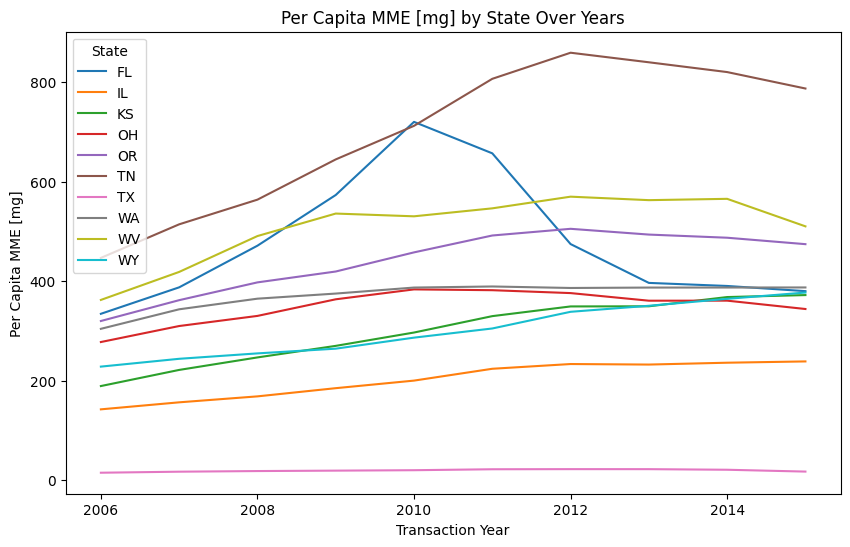

In [29]:
# Set the style for the plot (optional)
#plt.style.use('seaborn-dark')

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each state's data as a separate line
for state in yearly_trend['BUYER_STATE'].unique():
    state_data = yearly_trend[yearly_trend['BUYER_STATE'] == state]
    ax.plot(state_data['TransactionYear'], state_data['per_capita_MME_mg'], label=state)

# Add titles and labels
ax.set_title('Per Capita MME [mg] by State Over Years')
ax.set_xlabel('Transaction Year')
ax.set_ylabel('Per Capita MME [mg]')

# Add a legend
ax.legend(title='State')

# Show the plot
plt.show()
